In [68]:
#importo le librerie 
import subprocess
import SimpleITK as sitk
import matplotlib.pyplot as plt
import time

In [70]:
# path delle immagini e dei risultati
patient_image_path = '../data/batch_1/BA0001_2017_09_14/T1ontoFLAIR.nii'
arterial_atlas_path = '../atlases/ArterialAtlas_level2.nii'
aligned_image_path = '../data/batch_1/BA0001_2017_09_14/aligned_patient_image.nii'
transformation_matrix_path = '../data/batch_1/BA0001_2017_09_14/transformation_matrix.mat'
mask_path = '../data/batch_1/BA0001_2017_09_14/GT.nii'
aligned_mask_path = '../data/batch_1/BA0001_2017_09_14/mask_aligned.nii'

In [72]:
# definizione del comando per fare la registrazione lineare con il comando flirt di fsl 
command_flirt = [
    'flirt', 
    '-in', patient_image_path,
    '-ref', arterial_atlas_path,
    '-out', aligned_image_path,
    '-omat', transformation_matrix_path,
    '-dof', '12' #rotazione, traslazione, scala e shear
]

In [74]:
# eseguo il comando 
start_time = time.time()
result_flirt = subprocess.run(command_flirt, capture_output=True, text=True)
end_time = time.time()
print(f"FLIRT execution time: {end_time - start_time:.2f} seconds")

FLIRT execution time: 58.41 seconds


In [76]:
# definisco il comando per allineare la maschera ottenuta tramite segmentazione 
command_applyxfm = [
    'flirt',
    '-in', mask_path,
    '-ref', arterial_atlas_path,
    '-applyxfm', '-init', transformation_matrix_path,
    '-out', aligned_mask_path
]

In [78]:
# eseguo il comando per la maschera
result_applyxfm = subprocess.run(command_applyxfm, capture_output=True, text=True)


In [79]:
# funzione per il load delle immagini
def load_image(file_path):
    return sitk.ReadImage(file_path)


In [82]:
#normalizzazione delle immagini 
def normalize_image(image):
    array = sitk.GetArrayFromImage(image)
    min_val, max_val = array.min(), array.max()
    normalized_array = (array - min_val) / (max_val - min_val)
    return sitk.GetImageFromArray(normalized_array)

In [84]:
# funzione per visualizzare le immagini
def show_images_side_by_side(images, titles=None):
    num_images = len(images)
    plt.figure(figsize=(15, 5))
    
    for i, image in enumerate(images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(get_middle_slice(image), cmap='gray')
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [86]:
#nei plot voglio la slice a metà
def get_middle_slice(image):
    array = sitk.GetArrayFromImage(image)
    return array[array.shape[0] // 2, :, :]

In [88]:
# load delle immagini
patient_image = load_image(patient_image_path)
arterial_atlas = load_image(arterial_atlas_path)
aligned_image = load_image(aligned_image_path)
aligned_mask = load_image(aligned_mask_path)

In [90]:
# normalizzazione
patient_image_normalized = normalize_image(patient_image)
arterial_atlas_normalized = normalize_image(arterial_atlas)
aligned_image_normalized = normalize_image(aligned_image)
aligned_mask_normalized = normalize_image(aligned_mask)

In [92]:
# stampa delle informazioni delle immagini 
print("Patient Image Info:")
print("Size:", patient_image.GetSize())
print("Spacing:", patient_image.GetSpacing())
print("Intensity Range:", sitk.GetArrayFromImage(patient_image).min(), sitk.GetArrayFromImage(patient_image).max())

print("\nArterial Atlas Info:")
print("Size:", arterial_atlas.GetSize())
print("Spacing:", arterial_atlas.GetSpacing())
print("Intensity Range:", sitk.GetArrayFromImage(arterial_atlas).min(), sitk.GetArrayFromImage(arterial_atlas).max())

print("\nAligned Image Info:")
print("Size:", aligned_image.GetSize())
print("Spacing:", aligned_image.GetSpacing())
print("Intensity Range:", sitk.GetArrayFromImage(aligned_image).min(), sitk.GetArrayFromImage(aligned_image).max())

print("\nAligned Mask Info:")
print("Size:", aligned_mask.GetSize())
print("Spacing:", aligned_mask.GetSpacing())
print("Intensity Range:", sitk.GetArrayFromImage(aligned_mask).min(), sitk.GetArrayFromImage(aligned_mask).max())

Patient Image Info:
Size: (400, 512, 27)
Spacing: (0.4296875, 0.4296875, 5.200000286102295)
Intensity Range: -30.518614 1002.84155

Arterial Atlas Info:
Size: (182, 218, 182)
Spacing: (1.0, 1.0, 1.0)
Intensity Range: 0 10

Aligned Image Info:
Size: (182, 218, 182)
Spacing: (1.0, 1.0, 1.0)
Intensity Range: -0.1471523 878.28595

Aligned Mask Info:
Size: (182, 218, 182)
Spacing: (1.0, 1.0, 1.0)
Intensity Range: 0 114


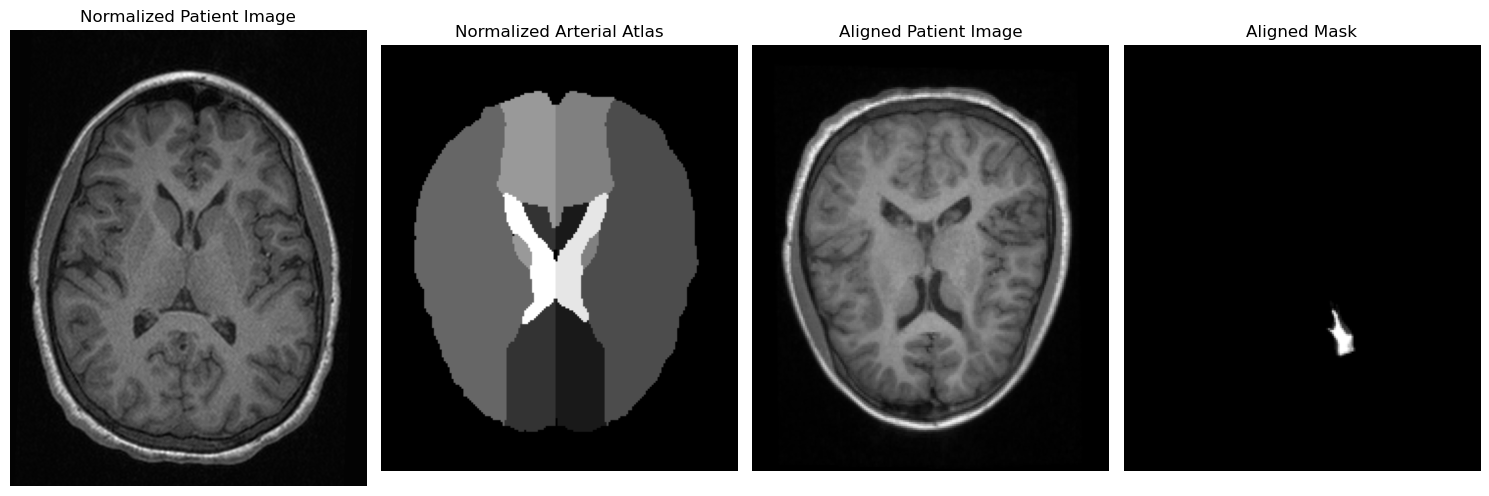

In [66]:
# visualizzo le immagini
show_images_side_by_side(
    [patient_image_normalized, arterial_atlas_normalized, aligned_image_normalized, aligned_mask_normalized],
    titles=['Normalized Patient Image', 'Normalized Arterial Atlas', 'Aligned Patient Image', 'Aligned Mask']
)
